# Smooth the data

In this case, the data do not have to be smoothed but in order to evaluate the curves on the same grid, we have to do it.

In [1]:
# Load packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from FDApy.misc import utils
from FDApy.preprocessing.smoothing.bandwidth import Bandwidth
from FDApy.representation.functional_data import DenseFunctionalData
from FDApy.representation.functional_data import IrregularFunctionalData
from FDApy.representation.functional_data import MultivariateFunctionalData
from FDApy.visualization.plot import plot

RECORDING_NUMBER = '00'

# Do it with 'x', 'y', 'xVelocity', 'yVelocity', 'xAcceleration', 'yAcceleration'
VAR = 'x'

In [2]:
# Load data
data_fd = pd.read_pickle(f'./data/processed/recording_{RECORDING_NUMBER}/{VAR}_fd.pkl')

In [3]:
# Print data
data_fd

Irregular functional data object with 310 observations on a 1-dimensional support.

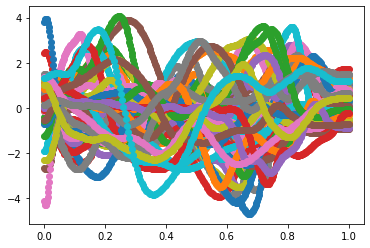

In [4]:
# Plot some data
plot(data_fd[0:50])
plt.show()

In [5]:
%%time
# Smooth the data on a common grid
points = np.linspace(0, 1, 151)
data_smooth = data_fd.smooth(points=0.5, neighborhood=14, points_estim=points)

CPU times: user 1min, sys: 39.6 s, total: 1min 39s
Wall time: 25 s


In [6]:
# Convert it to functional data object
data_smooth_fd = data_smooth.as_dense()

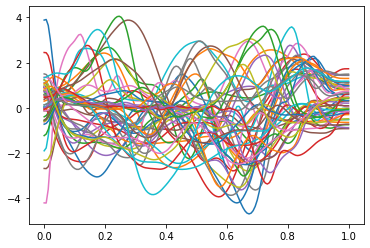

In [7]:
# Plot some smoothed data
plot(data_smooth_fd[0:50])
plt.show()

In [8]:
# Save the smoothed data
pd.to_pickle(data_smooth_fd, f'./data/processed/recording_{RECORDING_NUMBER}/{VAR}_smooth_fd.pkl')